In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
DT=pd.read_csv("C:\ExcelR\Data Scientist\Simple Linear Regression\delivery_time.csv") #import file

In [4]:
DT.head()  

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Perform EDA

In [5]:
DT.shape

(21, 2)

In [6]:
DT.info()  #To check what eda needs to be performed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
DT.drop_duplicates()   #to drop duplicate
DT[DT.duplicated()]      #to check the droped row, in this case none

,Delivery Time,Sorting Time


In [8]:
DT1=DT.rename({'Delivery Time':'dtime'},axis=1)    #rename columns
DT1

,dtime,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
DT2=DT1.rename({'Sorting Time':'stime'},axis=1)
DT2

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
DT=DT2
DT

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Perform Linear Regression

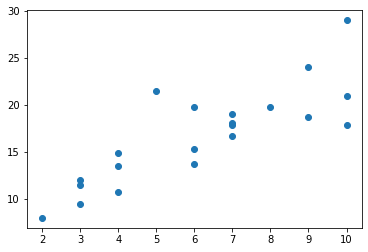

In [11]:
plt.scatter(DT.stime,DT.dtime)   #Scatter plot

In [12]:
DT.corr()      #Finding Correlation

,dtime,stime
dtime,1.000000,0.825997
stime,0.825997,1.000000


<AxesSubplot:xlabel='stime', ylabel='dtime'>

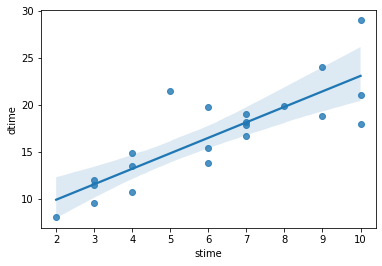

In [13]:
sns.regplot(x='stime', y='dtime', data=DT)     #ploting regression plot

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stime', ylabel='Density'>

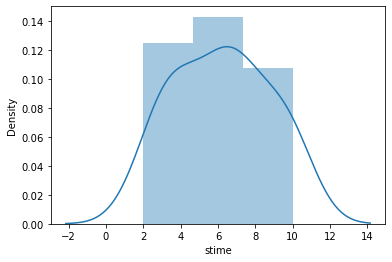

In [14]:
sns.distplot(DT['stime'])                 #ploting distribution plot for stime column 

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dtime', ylabel='Density'>

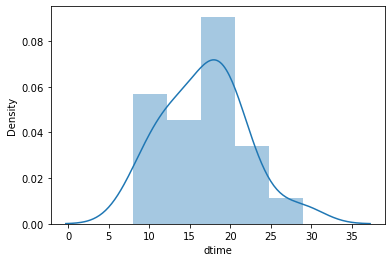

In [15]:
sns.distplot(DT['dtime'])                      #ploting distribution plot for dtime column

In [16]:
import statsmodels.formula.api as smf
model=smf.ols("dtime~stime",data=DT).fit()                #assign X and Y and build a model

In [17]:
model.params                                              #find the parameters of the model

Intercept    6.582734
stime        1.649020
dtype: float64

In [18]:
(model.rsquared,model.rsquared_adj)                       #find the rsquared and rsquared adjusted values

(0.6822714748417231, 0.6655489208860244)

# Model Prediction

In [19]:
new_data=pd.Series([10,4])

In [20]:
prdct=pd.DataFrame(new_data,columns=['stime'])

In [21]:
model.predict(prdct)

0    23.072933
1    13.178814
dtype: float64

# Transformation

In [22]:
DT_1=DT
DT_1['stime']=np.log(DT_1.stime)

In [23]:
model1=smf.ols("dtime~stime",data=DT_1).fit()

In [24]:
model1.params

Intercept    1.159684
stime        9.043413
dtype: float64

In [25]:
model1.rsquared,model1.rsquared_adj

(0.6954434611324223, 0.6794141696130761)

<AxesSubplot:xlabel='stime', ylabel='dtime'>

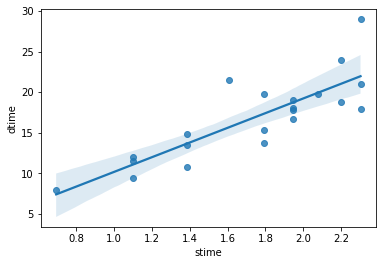

In [26]:
sns.regplot(x='stime',y='dtime',data=DT_1)

In [27]:
new_data1=pd.Series([10,4])
prdct1=pd.DataFrame(new_data1,columns=['stime'])
model1.predict(prdct1)

0    91.593818
1    37.333337
dtype: float64